In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
T=np.arange(100,850,50)
T
Cp=[40.144,41.826,43.396,44.860,46.222,47.489,48.665,49.755,50.764,51.698,52.559,53.353,54.084,54.755,55.371]


In [8]:
T=T+273.15 #Transformar de °C a K
y=Cp #Cp experimentales
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
X
beta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)  #este paso final da los coeficientes de Shomate
beta
#calcular para cada valor de T, y o Cp
Cp_calc=X.dot(beta)
Cp_calc 

array([40.14350768, 41.82688743, 43.39647979, 44.85939365, 46.22158077,
       47.48836887, 48.66472877, 49.75541704, 50.76505626, 51.69818233,
       52.55927337, 53.35276793, 54.08307687, 54.75459131, 55.37168797])

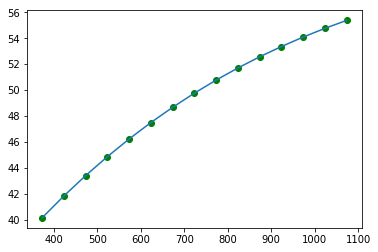

In [11]:
plt.scatter(T,y,color="green")
plt.plot(T,Cp_calc)
plt.show()

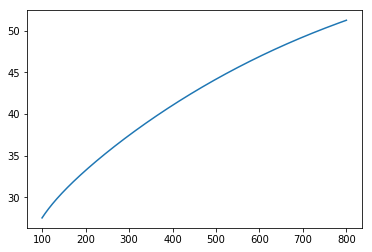

In [12]:

#para calcular H
dT=0.1
T=np.arange(100,800,dT)
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T #esta X va de 0.1 en 0.1 a excepcion de la anterior que iba de 50 en 50
Cp_calc=X.dot(beta)
plt.plot(T,Cp_calc)
plt.show()

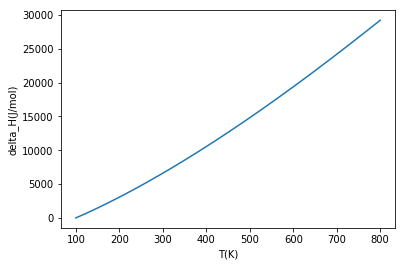

In [14]:
H=np.cumsum(Cp_calc*dT) #grafica de entalpia 
plt.plot(T,H)
plt.xlabel("T(K)")
plt.ylabel("delta_H(J/mol)")
plt.show()

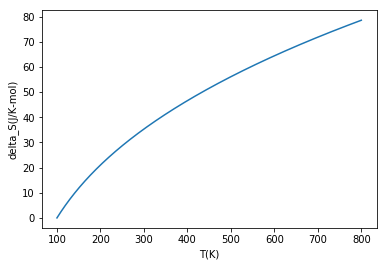

In [17]:
S=np.cumsum(Cp_calc/T*dT)
plt.plot(T,S)
plt.xlabel("T(K)")
plt.ylabel("delta_S(J/K-mol)")
plt.show()

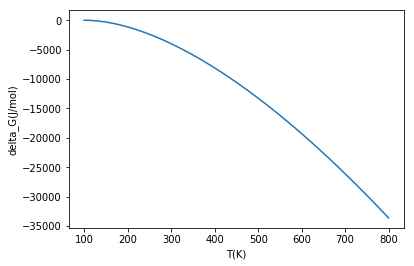

In [18]:
G=H-T*S
plt.plot(T,G)
plt.xlabel("T(K)")
plt.ylabel("delta_G(J/mol)")
plt.show()